In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df= pd.read_csv("/content/drive/MyDrive/Team Brainaic/reviews_data.csv")

In [3]:
df.head(5)

,Reviewer,Country,StarRatings,Subject,Review,Date_posted
0,Mike Santarcangelo,US,3,"Ali Express may be a fine company, but...","Ali Express is easy to work with, but they ful...","Tuesday, June 4, 2024"
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024"
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...","Monday, June 3, 2024"
3,Jim Corkery,CA,1,I purchased an Android Tesla style…,I purchased an Android Tesla style radio.\nAft...,"Sunday, June 2, 2024"
4,chris bardin,IE,1,They are an absolute con job dont waste…,They are an absolute con job dont waste your m...,"Tuesday, June 4, 2024"


In [4]:
#Check for null values

df.isnull().sum()

Reviewer         3
Country          3
StarRatings      0
Subject          0
Review         839
Date_posted      0
dtype: int64

Exploratory Data Analysis

In [5]:
df['reviews'] = df['Review'].astype(str)

In [6]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

df['length'] = df['reviews'].apply(len)

In [7]:
import matplotlib.pyplot as plt

In [8]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(df['StarRatings'].value_counts()/df.shape[0]*100,2)}")

Rating value count - percentage distribution: 
StarRatings
1    53.48
5    37.40
2     3.43
4     3.35
3     2.33
Name: count, dtype: float64


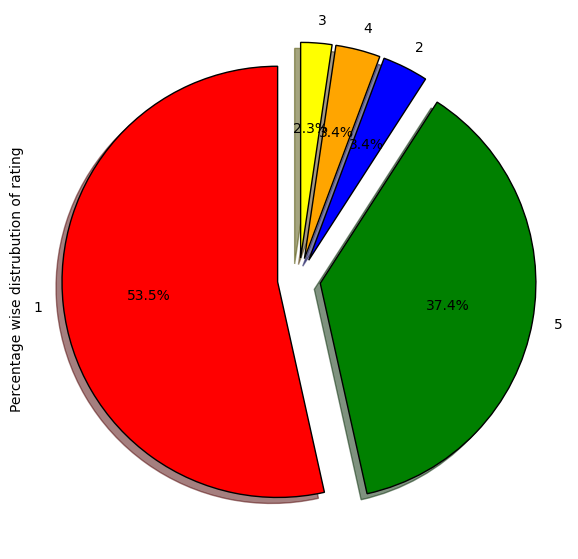

In [9]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['StarRatings'].value_counts()/df.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [10]:
df['labels'] = df['StarRatings'].apply(lambda x: 'positive' if x > 3 else 'negative' if x<3 else 'neutral')

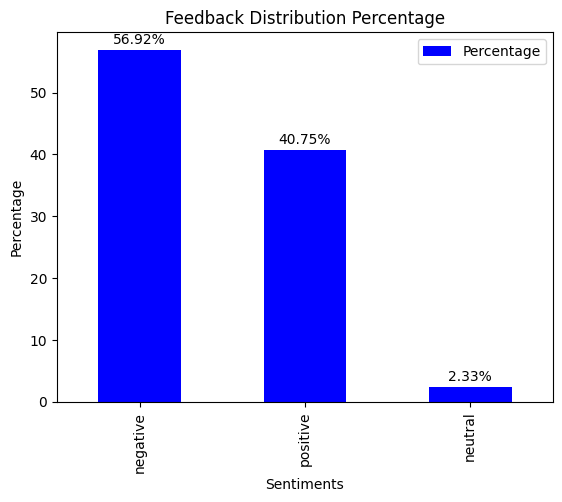

In [11]:
import matplotlib.pyplot as plt

# Calculate the percentage for each StarRating
label_counts = df['labels'].value_counts()
label_percentages = label_counts / label_counts.sum() * 100

# Plot the bar chart
ax = label_percentages.plot.bar(color='blue')

# Add title and labels
plt.title('Feedback Distribution Percentage')
plt.xlabel('Sentiments')
plt.ylabel('Percentage')

# Add the legend
plt.legend(['Percentage'], loc='upper right')

# Add percentage labels on the bars
for i, percentage in enumerate(label_percentages):
    ax.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()


In [12]:
import seaborn as sns

[Text(0.5, 1.0, 'Distribution of length of positive review ')]

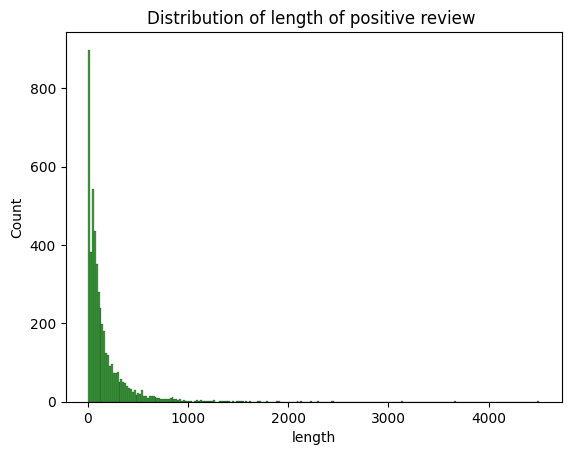

In [13]:
sns.histplot(df[df['labels']=='positive']['length'],color='green').set(title='Distribution of length of positive review ')

[Text(0.5, 1.0, 'Distribution of length of negative review ')]

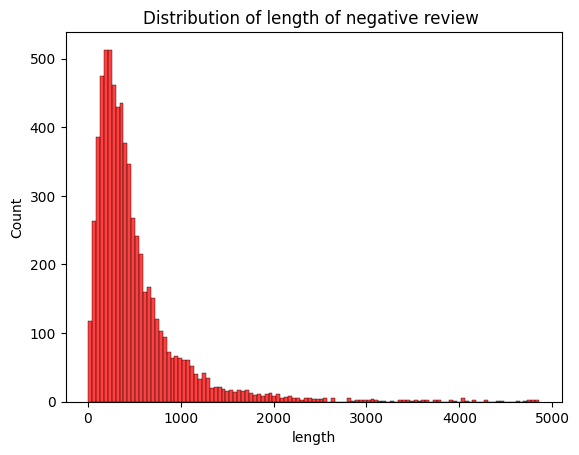

In [14]:
sns.histplot(df[df['labels']=='negative']['length'],color='red').set(title='Distribution of length of negative review ')

In [15]:
# Combine all reviews
reviews = " ".join([review for review in df['reviews']])

In [16]:
from wordcloud import WordCloud

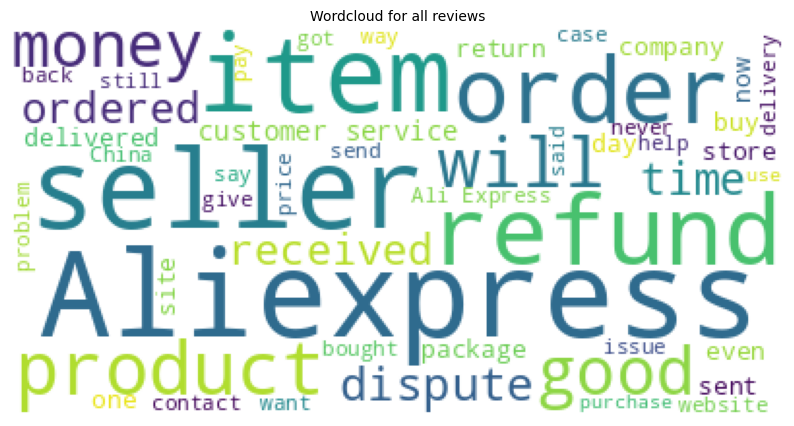

In [17]:


# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [18]:
# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

In [19]:
from tqdm import tqdm

In [20]:
tqdm.pandas()


In [21]:
df.columns

Index(['Reviewer', 'Country', 'StarRatings', 'Subject', 'Review',
       'Date_posted', 'reviews', 'length', 'labels'],
      dtype='object')

In [22]:
df['processed_data'] = df['reviews'].progress_apply(preprocess_text)

100%|██████████| 12000/12000 [00:15<00:00, 775.97it/s] 


In [23]:
df['processed_data'][1]

'using aliexpress well year consistently impressed range quality product well course price vast majority case far far better front big competitor uk also particularly like number place site arrange printed shirt bag case flag etc etc etc brilliant sure wait longer receive one order aliexpress practise week average uk patient plan ahead order placed aliexpress couple issue resolved quickly appropriately course would highly recommend aliexpress'

In [24]:
#we drop the neutral reviews
df = df[df['labels'] != 'neutral']

In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df['processed_data'], df['labels'], test_size=0.2, random_state=42)


In [26]:
X_train.shape

(9376,)

In [27]:
y_train.shape

(9376,)

In [28]:
# Define the pipeline
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [29]:
# Train the model
nb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [30]:
# Predict and evaluate
y_pred = nb_pipeline.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

%time

Accuracy: 0.8950511945392492
              precision    recall  f1-score   support

    negative       0.86      0.98      0.92      1380
    positive       0.97      0.77      0.86       964

    accuracy                           0.90      2344
   macro avg       0.91      0.88      0.89      2344
weighted avg       0.90      0.90      0.89      2344

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Define Random Forest pipeline
rf_pipeline = Pipeline([
('tfidf', TfidfVectorizer()),
('rf', RandomForestClassifier())])

In [33]:
# Train the model
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

In [34]:
# Predict and evaluate
y_pred = rf_pipeline.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

%time

Accuracy: 0.9014505119453925
              precision    recall  f1-score   support

    negative       0.89      0.95      0.92      1380
    positive       0.92      0.83      0.87       964

    accuracy                           0.90      2344
   macro avg       0.91      0.89      0.90      2344
weighted avg       0.90      0.90      0.90      2344

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
 # Define Logistic Regression pipeline
lr_pipeline = Pipeline([
('tfidf', TfidfVectorizer()),
('lr', LogisticRegression())])

In [37]:
# Train the model
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lr', LogisticRegression())])

In [38]:
# Predict and evaluate
y_pred = lr_pipeline.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

%time

Accuracy: 0.9368600682593856
              precision    recall  f1-score   support

    negative       0.94      0.96      0.95      1380
    positive       0.94      0.90      0.92       964

    accuracy                           0.94      2344
   macro avg       0.94      0.93      0.93      2344
weighted avg       0.94      0.94      0.94      2344

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


In [39]:
import pickle

In [41]:
#Saving the Count Vectorizer
pickle.dump(lr_pipeline, open('lr_pipeline.pkl', 'wb'))

In [45]:
# Function to evaluate a model and return the metrics
def evaluate_model(model, X_test, y_test, model_name):
    #start_time = time.time()
    y_pred = model.predict(X_test)
    #end_time = time.time()
    #elapsed_time = end_time - start_time


    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics = {
        'model': model_name,
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score']
        #'time': time
    }
    return metrics

In [48]:
# Evaluate all models
results = []

# Evaluate the pipeline model
nb_pipeline_metrics = evaluate_model(nb_pipeline, X_test, y_test, 'Naives Bayes Model')
results.append(pipeline_metrics)

In [49]:
# Evaluate the random forest pipeline model
rf_pipeline_metrics = evaluate_model(rf_pipeline, X_test, y_test, 'Random Forest Pipeline Model')
results.append(rf_pipeline_metrics)


In [50]:
lr_pipeline_metrics = evaluate_model(lr_pipeline, X_test, y_test, 'Logistic Regression Pipeline')
results.append(lr_pipeline_metrics)


In [51]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,model,accuracy,precision,recall,f1-score
0,Naives Bayes Model,0.895051,0.904055,0.895051,0.892592
1,Random Forest Pipeline Model,0.901451,0.902940,0.901451,0.900490
2,Logistic Regression Pipeline,0.936860,0.936931,0.936860,0.936666


In [52]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [53]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob


In [54]:
# Initialize sentiment analyzers
vader_analyzer = SentimentIntensityAnalyzer()

# Function to get VADER sentiment scores
def get_vader_sentiment(text):
    score = vader_analyzer.polarity_scores(text)
    return score['compound']

In [55]:
# Function to get TextBlob sentiment scores
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity


In [56]:
# Calculate sentiment scores
df['VADER_Sentiment'] = df['reviews'].apply(get_vader_sentiment)
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [57]:
df['TextBlob_Sentiment'] = df['reviews'].apply(get_textblob_sentiment)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [58]:
from transformers import pipeline as transformers_pipeline

In [59]:
roberta_analyzer = transformers_pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [60]:
# Function to get RoBERTa sentiment scores
def get_roberta_sentiment(text):
    result = roberta_analyzer(text)[0]
    sentiment_score = result['score'] if result['label'] == 'POSITIVE' else -result['score']
    return sentiment_score


In [63]:
import time

In [64]:
 #Function to evaluate sentiment analyzers
def evaluate_sentiment_analyzer(analyzer_name, analyzer_func, X_test):
    start_time = time.time()
    sentiments = X_test.apply(analyzer_func)
    end_time = time.time()
    elapsed_time = end_time - start_time

    metrics = {
        'model': analyzer_name,
        'time': elapsed_time,
        'average sentiment': sentiments.mean()
    }
    return metrics


In [65]:
# Evaluate sentiment analyzers
vader_metrics = evaluate_sentiment_analyzer('VADER Sentiment Analyzer', get_vader_sentiment, X_test)

results.append(vader_metrics)
%time

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


In [66]:
score = vader_analyzer.polarity_scores(X_test)['compound']

In [67]:
score

1.0

In [68]:
textblob_metrics = evaluate_sentiment_analyzer('TextBlob Sentiment Analyzer', get_textblob_sentiment, X_test)
results.append(textblob_metrics)
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [69]:
roberta_metrics = evaluate_sentiment_analyzer('RoBERTa Sentiment Analyzer', get_roberta_sentiment, X_test)
results.append(roberta_metrics)
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


In [70]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,model,accuracy,precision,recall,f1-score,time,average sentiment
0,Naives Bayes Model,0.895051,0.904055,0.895051,0.892592,NaN,NaN
1,Random Forest Pipeline Model,0.901451,0.902940,0.901451,0.900490,NaN,NaN
2,Logistic Regression Pipeline,0.936860,0.936931,0.936860,0.936666,NaN,NaN
3,VADER Sentiment Analyzer,NaN,NaN,NaN,NaN,4.022696,0.052661
4,TextBlob Sentiment Analyzer,NaN,NaN,NaN,NaN,0.752080,0.093336
5,RoBERTa Sentiment Analyzer,NaN,NaN,NaN,NaN,265.849145,-0.356117


In [90]:
import pickle

In [92]:
#Saving the Count Vectorizer
pickle.dump(lr_pipeline, open('lr_pipeline.pkl', 'wb'))

In [93]:
# Save the DataFrame to a CSV file
results_df.to_csv('sentiment_analysis_results.csv', index=False)

In [94]:
results_df

,model,accuracy,precision,recall,f1-score,time,average sentiment
0,Naives Bayes Model,0.895051,0.904055,0.895051,0.892592,NaN,NaN
1,Random Forest Pipeline Model,0.901451,0.902940,0.901451,0.900490,NaN,NaN
2,Logistic Regression Pipeline,0.936860,0.936931,0.936860,0.936666,NaN,NaN
3,VADER Sentiment Analyzer,NaN,NaN,NaN,NaN,4.022696,0.052661
4,TextBlob Sentiment Analyzer,NaN,NaN,NaN,NaN,0.752080,0.093336
5,RoBERTa Sentiment Analyzer,NaN,NaN,NaN,NaN,265.849145,-0.356117
